In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# 参考链接
# https://www.kaggle.com/ailobster/python-titanic-predictions-top-3

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')
print('There are {} samples in train_data'.format(len(train_data)))
print('There are {} samples in test_data'.format(len(test_data)))

There are 891 samples in train_data
There are 418 samples in test_data


In [3]:
PassengerId = test_data['PassengerId']
test_data['Survived'] = np.nan

all_data = pd.concat([train_data, test_data], ignore_index=True)

all_data.info()
display(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
all_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [6]:
display(all_data[all_data['Embarked'].isnull()])

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [7]:
all_data['Ticket_num'] = all_data['Ticket'].map(lambda x: re.sub('\D', '', x))
all_data['Ticket_num'] = pd.to_numeric(all_data['Ticket_num'])
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_num
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,521171.0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,17599.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,23101282.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,113803.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,373450.0


In [8]:
all_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Ticket_num        4
dtype: int64

In [9]:
select_data = all_data[(all_data['Parch'] == 0) & (all_data['SibSp'] == 0) & \
                      (all_data['Ticket_num'] > 110000) & (all_data['Ticket_num'] < 114000)]
select_data.sort_values('Ticket_num').head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_num
759,33.0,B77,S,86.5,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,760,1,female,0,1.0,110152,110152.0
257,30.0,B77,S,86.5,"Cherry, Miss. Gladys",0,258,1,female,0,1.0,110152,110152.0
504,16.0,B79,S,86.5,"Maioni, Miss. Roberta",0,505,1,female,0,1.0,110152,110152.0
475,NaN,A14,S,52.0,"Clifford, Mr. George Quincy",0,476,1,male,0,0.0,110465,110465.0
110,47.0,C110,S,52.0,"Porter, Mr. Walter Chamberlain",0,111,1,male,0,0.0,110465,110465.0


In [10]:
select_data.Embarked.value_counts()

S    54
C    10
Name: Embarked, dtype: int64

In [11]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

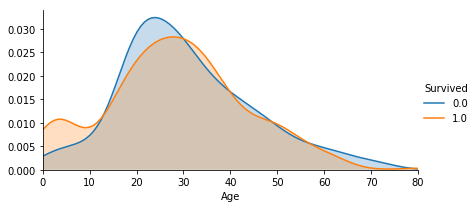

In [12]:
facet = sns.FacetGrid(all_data[0: 890], hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, all_data.loc[0: 890, 'Age'].max()))
facet.add_legend()

In [13]:
from sklearn.ensemble import RandomForestRegressor

age_df = all_data[['Age', 'Pclass', 'Sex', 'Parch', 'SibSp']]
age_df = pd.get_dummies(age_df)
age_df.head()

,Age,Pclass,Parch,SibSp,Sex_female,Sex_male
0,22.0,3,0,1,0,1
1,38.0,1,0,1,1,0
2,26.0,3,0,0,1,0
3,35.0,1,0,1,1,0
4,35.0,3,0,0,0,1


In [14]:
known_age =age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
X = known_age[:, 1:]
y = known_age[:, 0]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[(all_data.Age.isnull()), 'Age'] = predictedAges

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


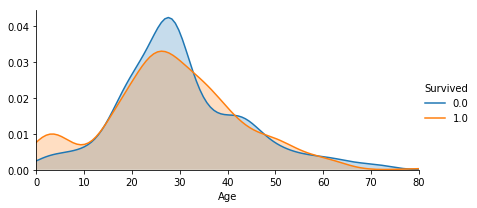

In [15]:
facet = sns.FacetGrid(all_data[0: 890], hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, all_data.loc[0: 890, 'Age'].max()))
facet.add_legend()

In [16]:
fare = all_data.loc[(all_data['Embarked'] == 'S') & (all_data['Pclass'] == 3), 'Fare'].median()
all_data['Fare'] = all_data['Fare'].fillna(fare)

In [17]:
titles = set()
for name in all_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Col', 'Dona', 'Mlle', 'Mme', 'Mr', 'Major', 'Miss', 'Don', 'Master', 'Rev', 'Mrs', 'Sir', 'Lady', 'Dr', 'Ms', 'Capt', 'the Countess', 'Jonkheer'}


In [18]:
Title_Dictionary = {
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Jonkheer': 'Master',
    'Don': 'Royalty',
    'Sir': 'Royalty',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'the Countess': 'Royalty',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Lady': 'Royalty',
    'Dona': 'Royalty'
}

def get_titles(data):
    data['Title'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    data['Title'] = data['Title'].map(Title_Dictionary)
    return data

get_titles(all_data)
all_data['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

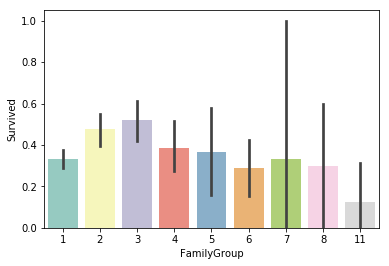

In [19]:
all_data['Surname'] = all_data['Name'].map(lambda name: name.split(',')[0].strip())

all_data['FamilyGroup'] = all_data['Surname'].map(all_data['Surname'].value_counts())
sns.barplot(x='FamilyGroup', y='Survived', data=all_data, palette='Set3')

In [20]:
Female_Child_Group = all_data.loc[(all_data['FamilyGroup'] >= 2) & ((all_data['Age'] <= 16) |
                                                                   (all_data['Sex'] == 'female'))]
Female_Child_Group = Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List = set(Female_Child_Group[Female_Child_Group.apply(lambda x: x == 0)].index)
print(Dead_List)

{'Danbom', 'Lahtinen', 'Barbara', 'Bourke', 'Boulos', 'Vander Planke', 'Elias', 'Palsson', 'Canavan', 'Skoog', 'Lefebre', 'Caram', 'Arnold-Franchi', 'Johnston', 'Panula', 'Lobb', 'Turpin', 'Zabour', 'Cacic', 'Rice', 'Rosblom', 'Jussila', 'Goodwin', 'Van Impe', 'Oreskovic', 'Robins', 'Sage', 'Strom', 'Olsson', 'Ford', 'Attalah', 'Ilmakangas'}


In [21]:
Male_Adult_Group = all_data.loc[(all_data['FamilyGroup'] >= 2) & (all_data['Age'] > 16) & 
                               (all_data['Sex'] == 'male')]
Male_Adult_List = Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List = set(Male_Adult_List[Male_Adult_List.apply(lambda x: x == 1)].index)
print(Survived_List)

{'Daly', 'Dick', 'Kimball', 'Frauenthal', 'Frolicher-Stehli', 'Moubarek', 'Cardeza', 'Bradley', 'McCoy', 'Goldenberg', 'Beane', 'Beckwith', 'Bishop', 'Jonsson', 'Duff Gordon', 'Taylor', 'Jussila', 'Chambers', 'Harder', 'Nakid', 'Greenfield'}


In [22]:
all_data.loc[(all_data['Survived'].isnull()) & (all_data['Surname'].apply(lambda x: x in Dead_List)),
            ['Sex', 'Age', 'Title']] = ['male', 28.0, 'Mr']
all_data.loc[(all_data['Survived'].isnull()) & (all_data['Surname'].apply(lambda x: x in Survived_List)),
            ['Sex', 'Age', 'Title']] = ['female', 5.0, 'Miss']

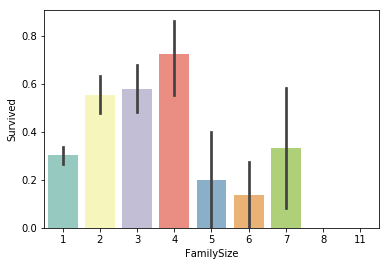

In [23]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=all_data, palette='Set3')

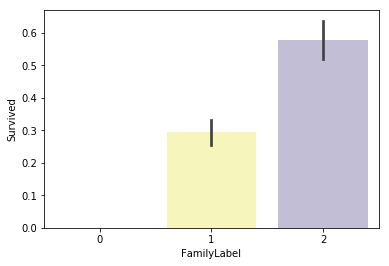

In [24]:
def Fam_label(s):
    if 2 <= s <= 4:
        return 2
    elif (4 < s <= 7) or s == 1:
        return 1
    else:
        return 0
all_data['FamilyLabel'] = all_data['FamilySize'].apply(Fam_label)
sns.barplot(x='FamilyLabel', y='Survived', data=all_data, palette='Set3')

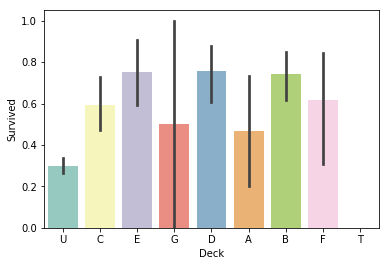

In [25]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck'] = all_data['Cabin'].str.get(0)
sns.barplot(x='Deck', y='Survived', data=all_data, palette='Set3')

In [26]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
Ticket_Count

{'CA. 2343': 11,
 'CA 2144': 8,
 '1601': 8,
 '347077': 7,
 'PC 17608': 7,
 '347082': 7,
 '3101295': 7,
 'S.O.C. 14879': 7,
 '347088': 6,
 '382652': 6,
 '19950': 6,
 '113781': 6,
 '4133': 5,
 '349909': 5,
 '220845': 5,
 'W./C. 6608': 5,
 'PC 17757': 5,
 '16966': 5,
 '113503': 5,
 '17421': 4,
 'C.A. 34651': 4,
 '36928': 4,
 '113760': 4,
 '2666': 4,
 'PC 17760': 4,
 'C.A. 2315': 4,
 '230136': 4,
 'W./C. 6607': 4,
 'C.A. 33112': 4,
 '12749': 4,
 'PC 17755': 4,
 '24160': 4,
 'SC/Paris 2123': 4,
 'LINE': 4,
 'PC 17483': 4,
 '110413': 3,
 'C.A. 31029': 3,
 'PC 17572': 3,
 '248727': 3,
 '370129': 3,
 '19877': 3,
 '248738': 3,
 '363291': 3,
 '19928': 3,
 '347080': 3,
 'S.C./PARIS 2079': 3,
 '35273': 3,
 'PC 17569': 3,
 '33638': 3,
 '345773': 3,
 'C.A. 37671': 3,
 '13502': 3,
 'PC 17758': 3,
 '2668': 3,
 'PC 17756': 3,
 '315153': 3,
 'SOTON/O.Q. 3101315': 3,
 '110152': 3,
 'C.A. 31921': 3,
 '26360': 3,
 '371110': 3,
 '239853': 3,
 'PC 17761': 3,
 'PC 17582': 3,
 '29750': 3,
 '29106': 3,
 '28220'

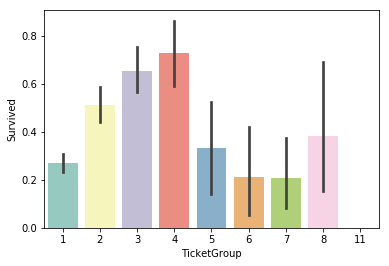

In [27]:
all_data['TicketGroup'] = all_data['Ticket'].map(Ticket_Count)
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3')

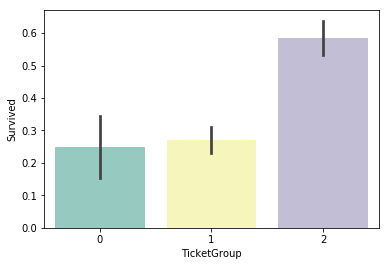

In [28]:
def Ticket_Label(s):
    if 2 <= s <= 4:
        return 2
    elif (4 < s <= 8) | s == 1:
        return 1
    else:
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y= 'Survived', data=all_data, palette='Set3')

In [29]:
all_data = all_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyLabel', 'Deck', 'TicketGroup']]
all_data.isnull().sum()

Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Title            0
FamilyLabel      0
Deck             0
TicketGroup      0
dtype: int64

In [30]:
all_data = all_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyLabel',
                    'Deck', 'TicketGroup']]
all_data = pd.get_dummies(all_data)
train = all_data[all_data['Survived'].notnull()]
test = all_data[all_data['Survived'].isnull()].drop('Survived', axis=1)
X = train.as_matrix()[:, 1:]
y = train.as_matrix()[:, 0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

select = SelectKBest(k=20)
clf = RandomForestClassifier(random_state=10, warm_start=True, n_estimators=26, max_depth=6, 
                            max_features='sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

cv_result = cross_validate(pipeline, X, y, cv=10)
print('CV Test Score: Mean - %.7g | Std - %.7g ' % (np.mean(cv_result['test_score']),
                                                   np.std(cv_result['test_score'])))

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [23] are constant.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


CV Test Score: Mean - 0.837237 | Std - 0.03192534 


In [32]:
test_x = test.as_matrix()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [33]:
predictions = pipeline.predict(test_x)
submission = pd.DataFrame({'PassengerId': PassengerId,
                          'Survived': predictions.astype(np.int32)})
submission.to_csv('rf_submission.csv', index=False)

In [34]:
from sklearn.feature_selection import SelectKBest
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

select = SelectKBest(k=20)
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,
                   objective='binary:logistic', booster='gbtree', nthread=None,
                   gamma=0, subsample=0.8, colsample_bytree=1, colsample_bylevel=1,
                   reg_alpha=0, reg_lambda=1, scale_pos_weight=1.2, base_score=0.5)
pipeline = make_pipeline(select, xgb)
pipeline.fit(X, y)

cv_result = cross_validate(pipeline, X, y, cv=10)
print(cv_result['test_score'])
print('CV Test Score: Mean - %.7g | Std - %.7g ' % (np.mean(cv_result['test_score']),
                                                   np.std(cv_result['test_score'])))

[0.83333333 0.87777778 0.7752809  0.85393258 0.87640449 0.85393258
 0.85393258 0.83146067 0.85393258 0.85227273]
CV Test Score: Mean - 0.846226 | Std - 0.02756416 


In [35]:
predictions = pipeline.predict(test_x)
submission = pd.DataFrame({'PassengerId': PassengerId,
                          'Survived': predictions.astype(np.int32)})
submission.to_csv('xgb_submission.csv', index=False)